In [49]:
from google.colab import files
files.upload()
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df = pd.read_excel('iris.xlsx', header=None, names=col_names)
df.head()
#df.describe()

Saving iris.xlsx to iris (4).xlsx


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df1 = df.copy()
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = df.shape
shape

(150, 5)

In [52]:
#Cual es el tipo de los atributos?
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [53]:
#Medida de centralidad y desviación para atributos numéricos:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


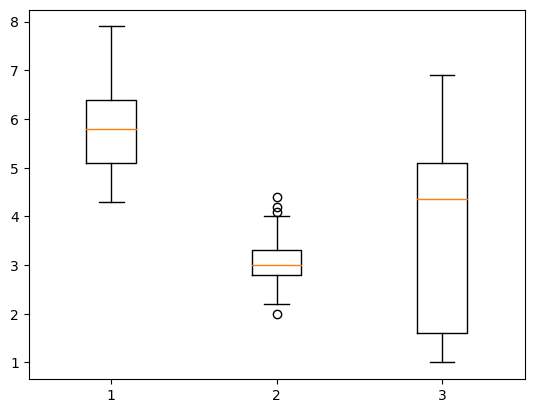

In [54]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((df['SepalLengthCm'],df['SepalWidthCm'],df['PetalLengthCm']))
plt.show()

In [55]:
#Medida de centralidad para atributos categóricos:
df.mode()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


In [56]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
df.corr()

<ipython-input-56-0923edd570e2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [57]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(df.isnull().sum(axis=1))

0

In [58]:
#Cuantos datos faltantes hay por cada atributo?
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


array([[<Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='Petal

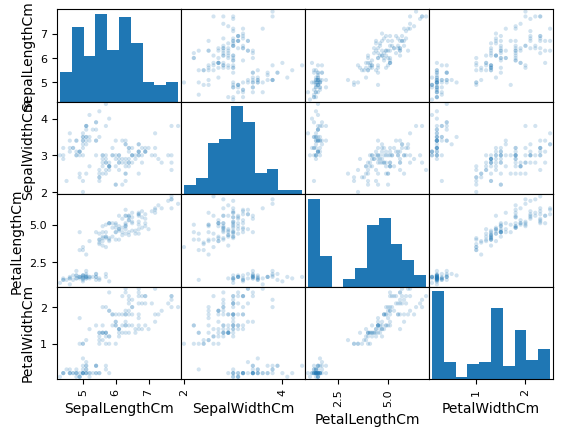

In [60]:
pd.plotting.scatter_matrix(df, alpha=0.2)

## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.

In [61]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
df["SepalLengthCm"].fillna("", inplace = True)
df["SepalWidthCm"].fillna("", inplace = True)
df["PetalLengthCm"].fillna("", inplace = True)
df["PetalWidthCm"].fillna("", inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
df['Species'] = labelencoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
from sklearn import preprocessing

# Se normalizan los cuatro atributos seleccionados
df['SepalLengthCm'] = preprocessing.scale(df['SepalLengthCm'])
df['SepalWidthCm'] = preprocessing.scale(df['SepalWidthCm'])
df['PetalLengthCm'] = preprocessing.scale(df['PetalLengthCm'])
df['PetalWidthCm'] = preprocessing.scale(df['PetalWidthCm'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [64]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = df.groupby('Species')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
Species                                                                      
0       0       -0.900681      1.494863      -1.284407     -1.050031        0
        1       -0.537178      1.494863      -1.284407     -1.312977        0
        2       -0.900681      1.726266      -1.284407     -1.181504        0
        3       -1.748856     -0.356361      -1.341272     -1.312977        0
        4       -1.506521      0.106445      -1.284407     -1.312977        0
...                   ...           ...            ...           ...      ...
2       45       1.522676     -0.124958       1.217684      1.185010        2
        46      -0.052506     -0.587764       0.762759      1.579429        2
        47       1.038005      0.106445       1.047087      1.579429        2
        48       0.674501      0.337848       0.876490      1.447956        2
        49       1.038005      0.569251       1.103953      1.185010        2

[150 rows x 5 columns]

In [65]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['Species'].value_counts())

0    50
1    50
2    50
Name: Species, dtype: int64


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo Species a partir de los valores de los demás atributos. Es decir, se va a predecir si una especie tiene las medidas ancho y alto adecuadas. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [66]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test 70/30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Species', axis=1), dataBal.Species, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [67]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [68]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1,
       2])

In [69]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9777777777777777

Usando el Clasificador KNN
Primero cargamos la librería. Entre ellas cargamos la clase KNeighborsClassifier, para poder utilizar el algoritmo KNN para problemas de clasificación.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

Primero crearemos unos datos de prueba "Specie_nuevo", de los que sabemos las caracteristicas pero no la Specie, cuatro características disponibles de las flores: longitud y ancho de pétalos, y longitud y ancho de sépalos (es decir, estamos trabajando en un espacio de 4 dimensiones)

In [71]:
Specie_nuevo = {'SepalLengthCm': [5.2],
               'SepalWidthCm': [3.82],
               'PetalLengthCm': [1.8],
               'PetalWidthCm': [0.2]
                }

In [98]:
Specie_actual = {'SepalLengthCm': [5.1],
               'SepalWidthCm': [3.5],
               'PetalLengthCm': [1.4],
               'PetalWidthCm': [0.2]
                }

In [72]:
Specie_nuevo = pd.DataFrame(Specie_nuevo)
Specie_nuevo.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.2,3.82,1.8,0.2


In [99]:
Specie_actual = pd.DataFrame(Specie_actual)
Specie_actual.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [75]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


A continuación entrenamos el algoritmo KNN con los datos para los que tenemos etiquetas. Posteriormente predecimos la clase de "Specie" para el que no tenemos etiqueta.

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
X = df1[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df1[['Species']]

knn.fit(X, y)
prediccion = knn.predict(Specie_nuevo)
actual = knn.predict(Specie_actual)
print(prediccion)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Conclusion: La Specie "Iris-setosa" es la que mas se ajusta al modelo

In [87]:
knn.score(X, y)

0.96

El acierto ha sido del 96%; Ambos modelos demuestran eficiencia.

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

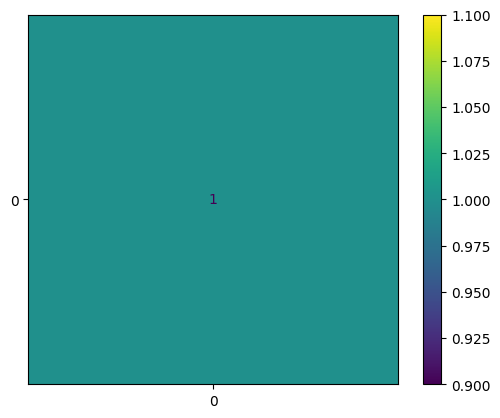

In [103]:
from sklearn import metrics
# Creamos la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(actual, prediccion)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()




# Fin del programa